<a href="https://colab.research.google.com/github/Karlamch/karlaMCH/blob/main/eii_u3_01_%3C22150453%3E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df = yf.download(
    tickers='TSLA',            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2024-04-09',        # Fecha de inicio
    end='2025-04-07',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df = df.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df.set_index('Date', inplace=True)


df

[*********************100%***********************]  1 of 1 completed


,TSLA_Open,TSLA_High,TSLA_Low,TSLA_Close,TSLA_Adj Close,TSLA_Volume
Date,,,,,,
2024-04-09,172.910004,179.220001,171.919998,176.880005,176.880005,103232700
2024-04-10,173.039993,174.929993,170.009995,171.759995,171.759995,84532400
2024-04-11,172.550003,175.880005,168.509995,174.600006,174.600006,94516000
2024-04-12,172.339996,173.809998,170.360001,171.050003,171.050003,64506600
2024-04-15,170.240005,170.690002,161.380005,161.479996,161.479996,100245300
...,...,...,...,...,...,...
2025-03-31,249.309998,260.559998,243.360001,259.160004,259.160004,134008900
2025-04-01,263.799988,277.450012,259.250000,268.459991,268.459991,146486900
2025-04-02,254.600006,284.989990,251.270004,282.760010,282.760010,212787800


# Medias móviles

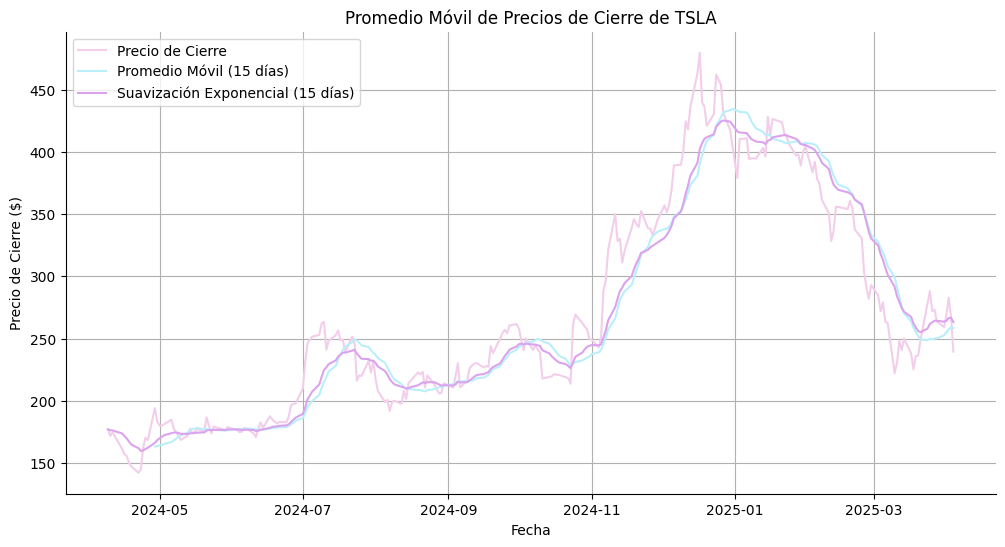

In [2]:
# Promedio Móvil Simple
ventana_sma = 15
df['SMA'] = df['TSLA_Close'].rolling(window=ventana_sma).mean()

# Promedio Móvil Exponencial
ventana_ses = 15
df['SES'] = df['TSLA_Close'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['TSLA_Close'], label='Precio de Cierre', color='#f3ceeb')
plt.plot(df['SMA'], label=f'Promedio Móvil ({ventana_sma} días)', color='#b9eff9')
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='#dba3ee')
plt.title('Promedio Móvil de Precios de Cierre de TSLA')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

El gráfico muestra la evolución del precio de cierre de las acciones de Tesla (línea rosa) a lo largo del tiempo, comparándolo con dos indicadores técnicos diseñados para suavizar las fluctuaciones del precio y mostrar la tendencia subyacente:

- Precio de Cierre (línea rosa): Esta es la línea que representa el
precio de la acción de Tesla al final de cada período (día, semana, etc.). Observamos una volatilidad significativa, con altibajos pronunciados a lo largo del tiempo.

- Promedio Móvil (15 días) (línea azul claro): Esta línea representa el promedio del precio de cierre de los últimos 15 períodos. Suaviza las fluctuaciones diarias del precio, ofreciendo una visión más clara de la tendencia a corto plazo. Cuando la línea de precio cruza por encima del promedio móvil, podría interpretarse como una señal alcista, y cuando cruza por debajo, como una señal bajista.

- Suavización Exponencial (15 días) (línea morada): Similar al promedio móvil, la suavización exponencial también busca identificar la tendencia. Sin embargo, otorga mayor peso a los precios más recientes, haciéndola más sensible a los cambios de tendencia que el promedio móvil simple. Los cruces de la línea de precio con la suavización exponencial también se utilizan como posibles señales de compra o venta.

Interpretaciones específicas que podemos observar en el gráfico:

- Tendencias: Podemos identificar períodos de tendencia alcista (donde los precios generalmente suben) y bajista (donde los precios generalmente bajan) observando la dirección general de las líneas suavizadas. Por ejemplo, parece haber una tendencia alcista significativa hacia la mitad del gráfico, seguida de una fuerte corrección.
- Soporte y Resistencia Dinámicas: Las líneas del promedio móvil y la suavización exponencial a menudo actúan como niveles dinámicos de soporte (donde el precio tiende a detener su caída) y resistencia (donde el precio tiende a detener su subida).
- Señales de Cruce: Presta atención a los momentos en que la línea de precio cruza las líneas del promedio móvil o la suavización exponencial. Un cruce alcista (de abajo hacia arriba) podría sugerir una oportunidad de compra, mientras que un cruce bajista (de arriba hacia abajo) podría sugerir una oportunidad de venta. Sin embargo, es importante usar estos cruces en conjunto con otros indicadores y análisis.
- Volatilidad: La distancia entre la línea de precio y las líneas suavizadas puede indicar la volatilidad del mercado. Una mayor distancia sugiere una mayor volatilidad.

# Prueba Dickey-Fuller Aumentada

In [3]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['TSLA_Close'].dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")


Estadístico ADF: -1.363085249351435
p-value: 0.5998400650310416
La tendencia no es estacionaria (aceptamos la hipótesis nula).


# Regresión polinomial

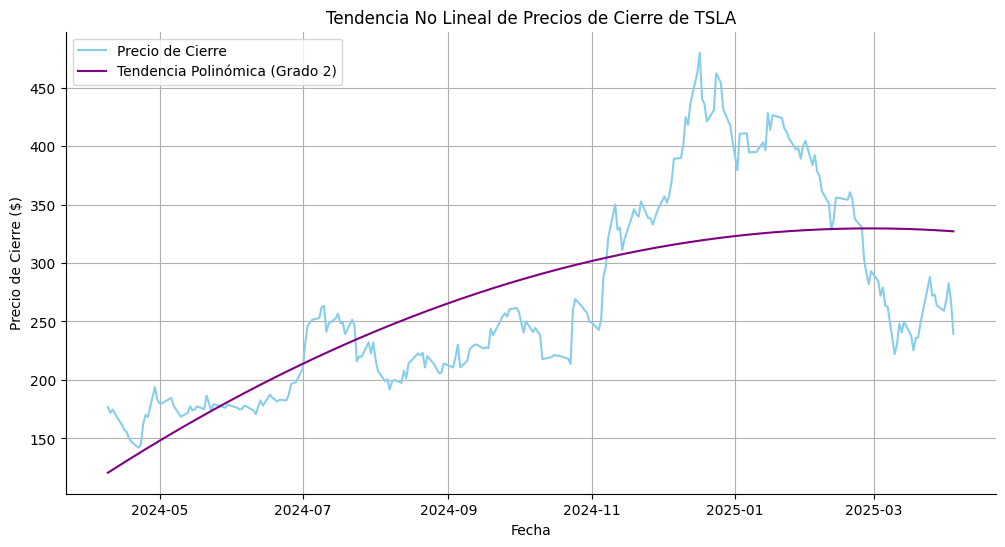

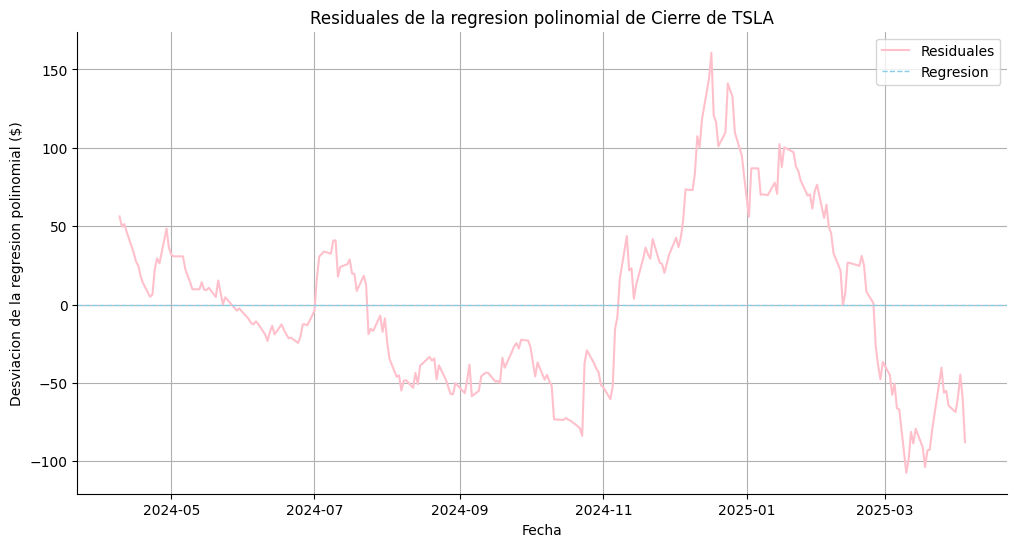

In [4]:
from numpy.polynomial.polynomial import Polynomial

# Paso 1: Convertir fechas a números
# Creamos una nueva columna llamada 'Date' la cual contiene las fechas en
# segundos desde el 1 de de enero de 1970 (tiempo UNIX)
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['TSLA_Close']

# Paso 3: Ajustar un modelo polinómico
grado = 2
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid'] = y - df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gráfica
plt.figure(
    figsize=(12, 6) # tamaño (horizontal, vertical)
    )

# qué se va a graficar:
plt.plot(
    y,
    label='Precio de Cierre', # etiqueta que aparecerá en la leyenda
    color='skyblue'
    )

plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='purple')
plt.title('Tendencia No Lineal de Precios de Cierre de TSLA') # Título
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('Precio de Cierre ($)')                            # nombre del eje y
plt.legend()                                                  # agrega la leyenda
plt.grid()                                                    # agrega una cuadrícula
plt.gca().spines['top'].set_visible(False)                    # elimina los bordes superiores
plt.gca().spines['right'].set_visible(False)                  # elimina los bordes derechos
plt.show()                                                    # muestra el gráfico (innecesario en colab)




# Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_Resid'], label='Residuales', color='pink')
plt.axhline(0, color='skyblue', label='Regresion',linestyle='--', linewidth=1)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de TSLA')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Este primer gráfico sugiere que el activo experimentó una tendencia alcista general durante el período mostrado, aunque esta tendencia parece estar perdiendo fuerza y ​​estabilizándose hacia el final. La volatilidad del precio de cierre es evidente al oscilar alrededor de esta tendencia a largo plazo.

El segundo grafico nos ayuda a evaluar la calidad del ajuste del modelo de regresión polinomial al precio de cierre de Tesla. Un buen modelo debería producir residuos que parezcan aleatorios y estén centrados alrededor de cero. La presencia de patrones o una gran variabilidad en los residuos podría indicar que el modelo necesita ser mejorado.

## Para Pros: Series de Fourier

Las series de Fourier descomponen cualquier cosa como una suma de senos y cosenos. Por esta razón, son una herramienta útil para extraer patrones oscilantes. Este es un tema muy complicado y alejado a todo lo que han manejado, por esta razón no les voy a pedir que lo usen. Aquí lo he simplificado tanto como he podido por si se animan.

In [5]:
# Aquí no le muevan a nada
# Básicamente, lo que se hace este bloque es crear la función
# Transformada_de_Fourier, puesto a que no existe para lo que la quiero usar.

def Transformada_de_Fourier(serie, terminos, un_grafico):
  '''La función acepta los argumentos "serie", la cual debe de ser un array
  en numpy y en pandas de la forma df["my_variable"].values. Por otra parte,
  el parámetro "terminos" es un número natural que indica la cantidad de
  términos que desarrolla la serie. Entre mayor sea el número de términos,
  la serie será más precisa, pero más difícil de interpretar.

  La función tiene como salida una lista con los componentes sinosoidales de serie.
  El último elemento de la lista, es la suma de todos los componentes'''

  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  from scipy.fftpack import fft, ifft

  # Supongamos que tienes una serie en df['AAPL_Close']
  # Reemplaza esta línea con tu DataFrame y serie específicos
  n = len(serie)

  # Calcular la transformada de Fourier
  transformada_fourier = fft(serie)

  # Obtener las frecuencias
  frecuencias = np.fft.fftfreq(n)

  # Crear un DataFrame para almacenar la frecuencia y su magnitud
  componentes = pd.DataFrame({
      'frecuencia': frecuencias,
      'magnitud': np.abs(transformada_fourier),
      'longitud_de_onda': 1 / frecuencias
  })

  # Ordenar el dataframe de mayor a menor en términos de magnitud

  componentes = componentes.sort_values(by='magnitud', ascending=False)

  # Seleccionar las frecuencias con mayor magnitud (excluyendo la frecuencia cero)
  top_frecuencias = componentes.loc[componentes['frecuencia'] > 0].nlargest(terminos, 'magnitud')
  top_frecuencias.reset_index(drop=True, inplace=True)
  print("Frecuencias principales:\n", top_frecuencias)

  # Crear el índice de tiempo para la serie
  t = np.arange(n)

  # Graficar cada componente de frecuencia junto con la serie original
  plt.figure(figsize=(12, 4))

  componente_temporal_sumado = np.zeros_like(serie)
  componentes_temporales = []

  n=0
  for i, row in top_frecuencias.iterrows():
      n+=1
      # Copiar la transformada de Fourier y mantener solo la frecuencia actual
      fourier_component = np.zeros_like(transformada_fourier)
      idx = np.where(frecuencias == row['frecuencia'])[0][0]  # índice de la frecuencia en la FFT
      fourier_component[idx] = transformada_fourier[idx]  # mantener solo la frecuencia positiva
      fourier_component[-idx] = transformada_fourier[-idx]  # mantener la frecuencia negativa correspondiente
      if n == (terminos+1):
        break

      # Reconstruir la señal en el tiempo
      componente_temporal = ifft(fourier_component).real
      componentes_temporales.append(componente_temporal)
      componente_temporal_sumado += componente_temporal

      # Graficar la componente
      plt.plot(
          componente_temporal,
          label=f'Longitud de onda {1 / row["frecuencia"]:.0f}',
          alpha=1,
          linewidth = 0.5,
          )
      plt.title('Componentes de Fourier de la Serie')
      plt.xlabel('Tiempo')
      plt.ylabel('Valor')
      plt.legend()
      plt.grid()

  componentes_temporales.append(componente_temporal_sumado)
  plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  if not un_grafico:
    plt.figure(figsize=(12, 4))
    plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  plt.plot(componente_temporal_sumado, label='Componente temporal sumada', color='red')
  plt.legend()
  plt.title('Suma de los Componentes de Fourier de la Serie')
  plt.xlabel('Tiempo')
  plt.ylabel('Valor')
  plt.grid()
  plt.show()

  return componentes_temporales

Frecuencias principales:
    frecuencia     magnitud  longitud_de_onda
0    0.008032  6300.728394            124.50
1    0.004016  4123.318601            249.00
2    0.012048  3672.439065             83.00
3    0.020080  2583.720835             49.80
4    0.016064  1941.032569             62.25


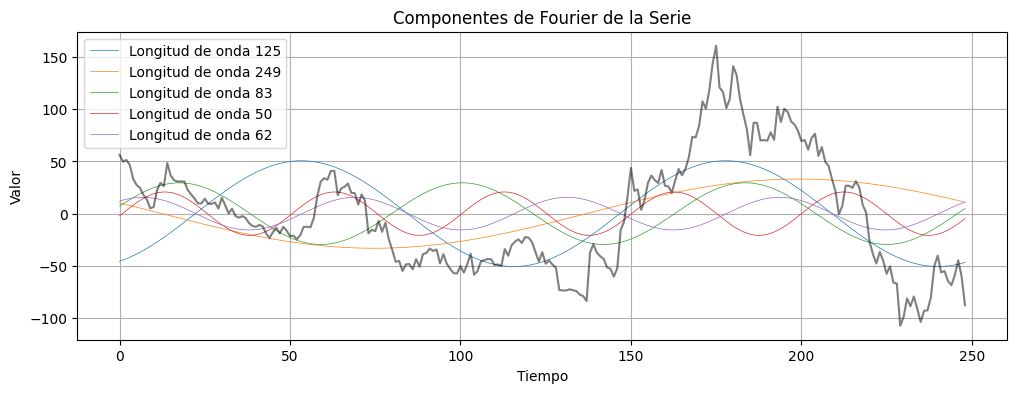

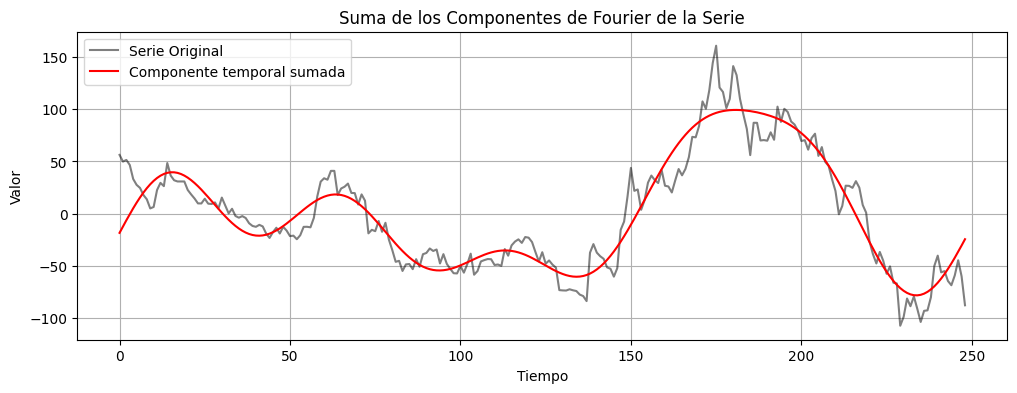

In [6]:
serie = df['Poly_Resid'].values
terminos = 5
un_grafico = False

cts = Transformada_de_Fourier(serie, terminos, un_grafico)

# cts: componente temporal sumado


En estos gráficos, la longitud de onda equivale a la unidad de tiempo (en este caso, días) que tarda la onda en volver al mismo sitio. Algo que en nuestro contexto podríamos interpretar como estasionalidad. Vemos que la oscilación más grande se presenta cada 378 días. Dado que esto es más de un año, esto sería más bien un ciclo. Sin embargo, se puede apreciar algo muy interesante, la longitud de onda siguiente es de 126 en unidades de tiempo (días) que es justo la mitad de la cantidad de días de negociación en un año!!! 😯

Éste análisis de Fourier revela las principales ondas sinusoidales que componen la serie de tiempo original. La tabla cuantifica la frecuencia, magnitud y longitud de onda de estos componentes, mientras que el gráfico los visualiza, mostrando cómo diferentes ciclos de distintas duraciones contribuyen a las fluctuaciones observadas en la serie original.

Éste gráfico muestra cómo la suma de los principales componentes de Fourier puede aproximar la serie de tiempo original, capturando sus tendencias y ciclos dominantes y suavizando las fluctuaciones de menor importancia. La calidad de la aproximación depende de cuántos y cuáles componentes de Fourier se incluyan en la suma.


# Gráfico de autocorrelación

El gráfico de autocorrelación tiene como eje vertical los valores de la r de Pearson objenidos desplazando la serie hacia atrás en el tiempo. La medida de estos desplazamientos se muestra en el eje horizontal "lags". Se puede ver que de fondo hay una especie de sombra, esa sombra muestra el intervalo de confianza con el nivel de significancia que establezcan. Si la r de Pearson para un lag específico está fuera fuera de esa sombra, hay un nivel de confianza para afirmar que $r\neq0$ y por lo tanto hay correlación.
<br>
Este gráfico se usa para muchas cosas. Nosotros lo intentamos usar para obtener la estacionalidad, pero también se usa para obtener algunos parámetros del modelo ARIMA.

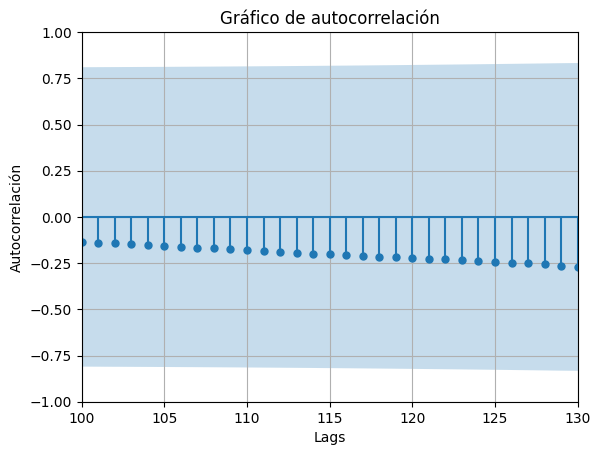

In [7]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

nivel_de_significancia = 0.05

plot_acf(
    df['TSLA_Close'],
    lags=130,
    alpha=nivel_de_significancia
    )

plt.xlim([100, 130])
plt.ylim([-1, 1])
plt.title('Gráfico de autocorrelación')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.grid()
plt.show()

En este gráfico específico, observamos lo siguiente para los lags entre 100 y 130:

- Autocorrelaciones Negativas: Todas las barras verticales se encuentran por debajo de cero, lo que indica autocorrelaciones negativas para estos lags. Esto sugiere que los valores de la serie en un momento dado tienden a ser inversamente relacionados con los valores observados entre 100 y 130 períodos anteriores.
- Significancia Estadística: La mayoría de las barras parecen estar fuera del área sombreada azul (intervalo de confianza). Esto sugiere que estas autocorrelaciones negativas son estadísticamente significativas, es decir, es poco probable que hayan ocurrido por casualidad.
- Magnitud de la Autocorrelación: La magnitud de las autocorrelaciones negativas parece ser relativamente pequeña, oscilando aproximadamente entre -0.1 y -0.2. Aunque son significativas, la fuerza de la relación inversa no es extremadamente fuerte.
- Patrón Aparente: No se observa un patrón claro de decaimiento o comportamiento cíclico pronunciado en estas autocorrelaciones para los lags mostrados.

Posibles Implicaciones:
- Comportamiento a Largo Plazo: Este análisis se centra en lags relativamente grandes (100-130 períodos). Las autocorrelaciones significativas en estos lags podrían indicar algún tipo de patrón o dependencia a largo plazo en la serie de tiempo.
- Necesidad de un Modelo Específico: La presencia de autocorrelaciones significativas (incluso negativas) sugiere que los valores de la serie no son completamente aleatorios y que existe una estructura temporal que podría ser modelada.

# Gráfico de autocorrelación parcial (PACF)

Su propósito principal es ayudar a identificar el orden de dependencia en una serie temporal (útil para ARIMA), es decir, cuántos valores anteriores están correlacionados con el valor actual, después de eliminar el efecto de las observaciones intermedias.

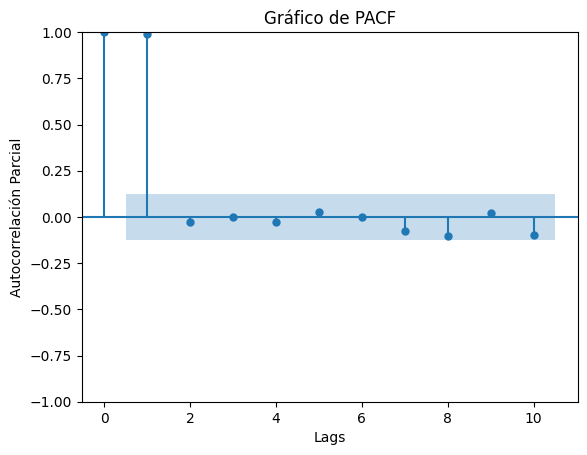

In [8]:
# Generar el gráfico PACF
from statsmodels.graphics.tsaplots import plot_pacf

nivel_de_significancia = 0.05
plot_pacf(df['TSLA_Close'], lags=10, alpha=nivel_de_significancia)
plt.title('Gráfico de PACF')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación Parcial')
plt.show()


 El gráfico de PACF sugiere fuertemente que la serie de tiempo subyacente podría ser modelada adecuadamente utilizando un modelo Autorregresivo de orden 1, donde el valor actual de la serie está directamente influenciado por su valor inmediatamente anterior.

# Descomposición de la serie

`sm.tsa.seasonal_descompose` descompone la serie de tiempo en los componentes Trend, Seasonal y Resid, que son Tendencia, Estacionalidad y Residuos, respectivamente. De tal manera que la serie de tiempo es igual la suma de estos tres elementos.

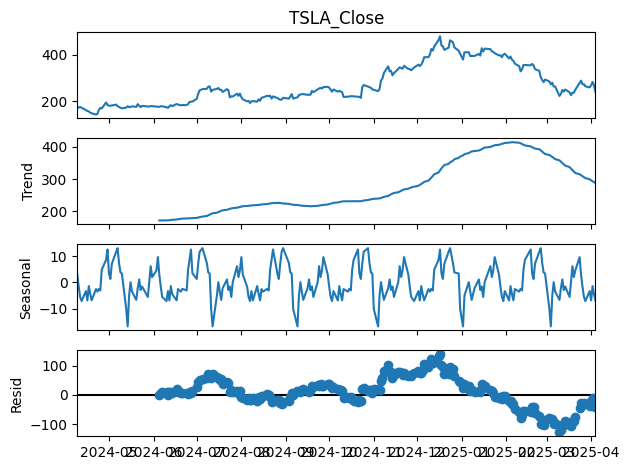

In [9]:
# Descomponer la serie temporal
import statsmodels.api as sm

descomposicion = sm.tsa.seasonal_decompose(
    df['TSLA_Close'],
    model='additive',
    period=40,
    extrapolate_trend=0,
    two_sided=False,
    )  # 252 días de negociación al año
fig = descomposicion.plot()
plt.show()


Ésta descomposición estacional nos ayuda a visualizar cómo la tendencia subyacente, los patrones estacionales recurrentes y los factores residuales contribuyen al comportamiento del precio de cierre de Tesla a lo largo del tiempo. Analizar estos componentes por separado puede proporcionar información valiosa para la previsión y la comprensión de los impulsores del precio.

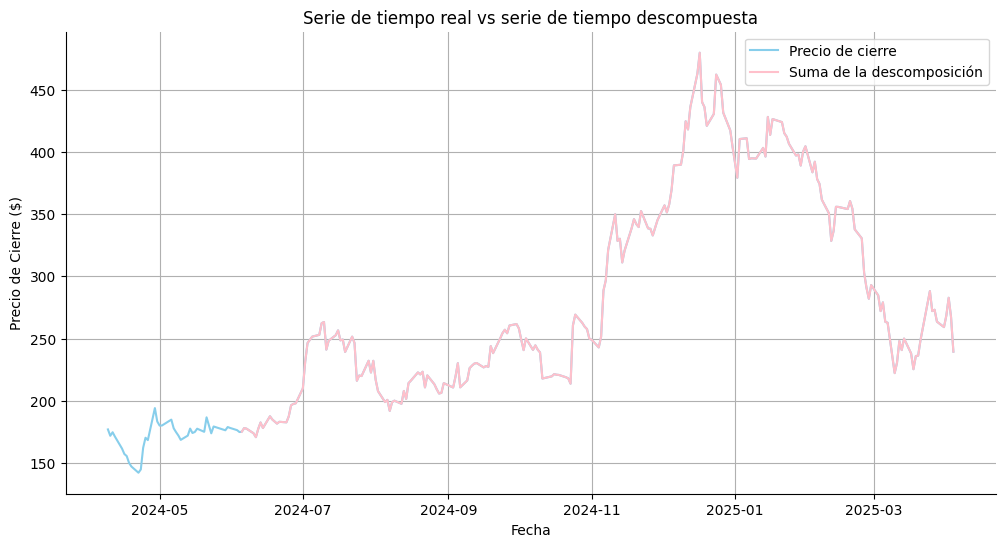

In [10]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['TSLA_Close'], label='Precio de cierre', color='skyblue')
plt.plot(descomposicion.trend + descomposicion.seasonal + descomposicion.resid, label=f'Suma de la descomposición', color='pink')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

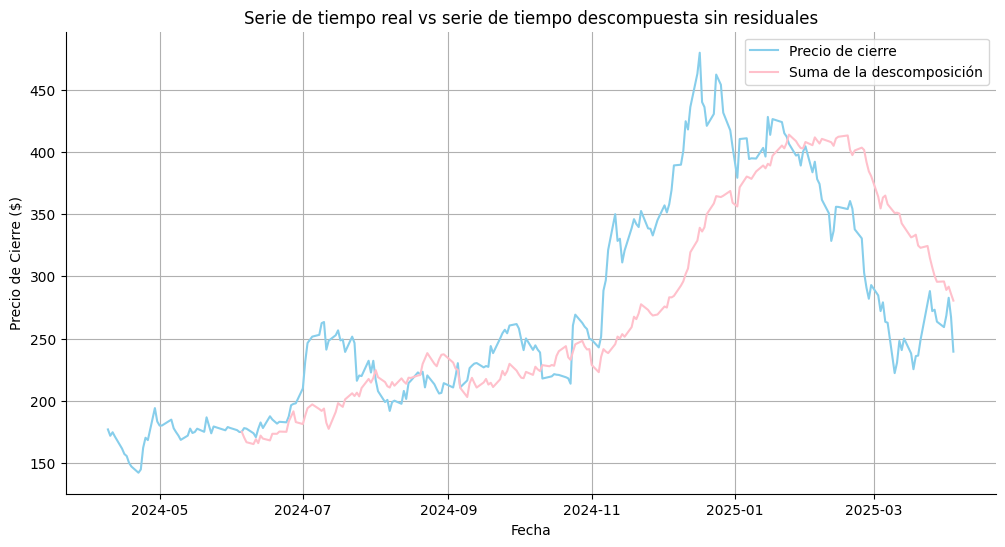

In [11]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['TSLA_Close'], label='Precio de cierre', color='skyblue')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Suma de la descomposición', color="pink")
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Éste gráfico visualiza el impacto de eliminar los residuos de la serie descompuesta. Nos muestra la parte del comportamiento del precio de cierre de TSLA que puede explicarse por la tendencia y la estacionalidad, y las diferencias revelan la magnitud de las fluctuaciones irregulares o no modeladas

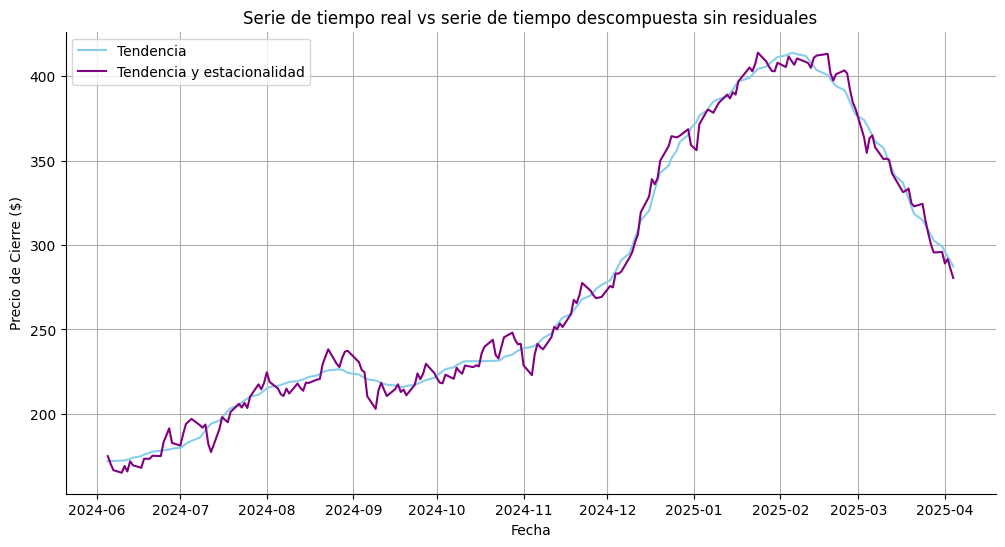

In [12]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(descomposicion.trend, label='Tendencia', color='skyblue')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Tendencia y estacionalidad', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

**Importante**: Es posible que hayan campturado bien la estacionalidad y que la prueba ADF de los residuales les indique que hay estacionariedad. Sin embargo, en el gráfico anterior vemos que no hay mucha diferencia entre la tendencia y la tendencia con estacionalidad. Por lo tanto, la estacionalidad, aunque existe, no es significativa. Esto se ilustra en el siguiente gráfico.

 Podemos observar cómo la línea morada sigue la tendencia general de la línea azul clara, pero con oscilaciones superpuestas que representan el patrón estacional. Estas oscilaciones parecen tener una frecuencia relativamente constante a lo largo del tiempo, lo que es característico de la estacionalidad.
 Éste gráfico destaca la contribución de la componente estacional al comportamiento del precio de cierre de TSLA, mostrando cómo se superpone a la tendencia subyacente para generar las fluctuaciones más a corto plazo que observamos en la serie de tiempo real.

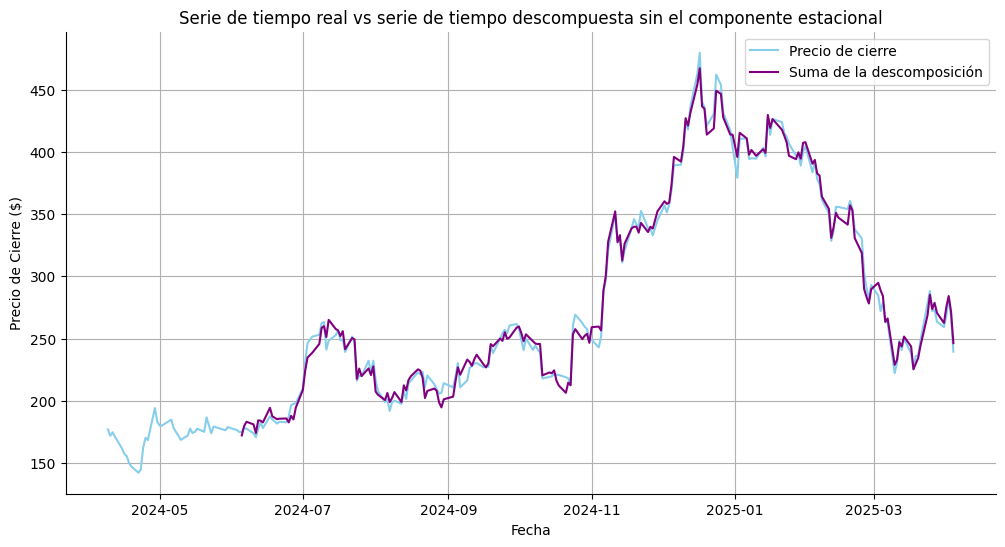

In [13]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['TSLA_Close'], label='Precio de cierre', color='skyblue')
plt.plot(descomposicion.trend + descomposicion.resid, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin el componente estacional')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

En este gráfico, la línea morada sigue la tendencia general de la línea azul clara, pero las fluctuaciones de alta frecuencia que podrían atribuirse a la estacionalidad se han suavizado.

Podemos observar que en algunos puntos, la línea azul tiene picos más altos o valles más bajos que la línea morada, lo que sugiere la influencia de la estacionalidad en esos momentos.
La diferencia entre las dos líneas varía a lo largo del tiempo, lo que indica que la magnitud de la influencia estacional puede no ser constante.
Nos permite ver cómo se vería la serie de tiempo del precio de cierre de TSLA si se removieran los patrones estacionales. Las diferencias entre la serie real y esta versión desestacionalizada resaltan el impacto de la estacionalidad en las fluctuaciones del precio.

# Prueba t pareada para verificar si la estacionalidad tiene un efecto significativo

In [14]:
from scipy.stats import ttest_rel

# Prueba t pareada para el efecto significativo de la estacionalidad

#Hipótesis nula (H₀): Ambas series son iguales.
#Hipótesis alternativa (H₁): Ambas series son diferentes


nivel_de_significancia = 0.05
tendencia = descomposicion.trend
tendencia_estacionalidad = descomposicion.seasonal + descomposicion.trend

# Eliminar valores NaN de ambas series
tendencia.dropna(inplace=True)
tendencia_estacionalidad.dropna(inplace=True)

# Realizar la prueba t pareada
t_stat, p_valor = ttest_rel(tendencia, tendencia_estacionalidad)

print("Estadístico t:", t_stat)
print("Valor p:", p_valor)
print("\n")

# Interpretación de los resultados
if p_valor < nivel_de_significancia:
    print("El valor p es menor que 0.05, por lo tanto, rechazamos la hipótesis nula.")
    print("Conclusión: La estacionalidad tiene un efecto significativo en la serie de tiempo.")
else:
    print("El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.")
    print("Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.")


Estadístico t: 0.37515016975459226
Valor p: 0.7079310418442221


El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.
Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.


# Prueba Wilcoxon pareada para verificar si la estacionalidad tiene un efecto significativo

In [15]:
from scipy.stats import wilcoxon

# Prueba Wilcoxon pareada para el efecto significativo de la estacionalidad

#Hipótesis nula (H₀): Ambas series son iguales.
#Hipótesis alternativa (H₁): Ambas series son diferentes

tendencia = descomposicion.trend
tendencia_estacionalidad = descomposicion.seasonal + descomposicion.trend

# Eliminar valores NaN de ambas series
tendencia.dropna(inplace=True)
tendencia_estacionalidad.dropna(inplace=True)

# Realizar la prueba de Wilcoxon
w_stat, p_valor = wilcoxon(tendencia, tendencia_estacionalidad)

print("Estadístico de Wilcoxon:", w_stat)
print("Valor p:", p_valor)
print("\n")

# Interpretación de los resultados
if p_valor < 0.05:
    print("El valor p es menor que 0.05, por lo tanto, rechazamos la hipótesis nula.")
    print("Conclusión: La estacionalidad tiene un efecto significativo en la serie de tiempo.")
else:
    print("El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.")
    print("Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.")


Estadístico de Wilcoxon: 10418.0
Valor p: 0.5264138152571085


El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.
Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.


# Prophet

In [16]:
# Este data frame son del siguiente año a df. Esto con el propósito de testear prophet
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df2 = yf.download(
    tickers='AAPL',            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2018-01-01',        # Fecha de inicio
    end='2018-12-30',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df2 = df2.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df2.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df2.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df2['Date'] = pd.to_datetime(df2['Date'])

df2['Date'] = df2['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df2.set_index('Date', inplace=True)


df2

[*********************100%***********************]  1 of 1 completed


,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Adj Close,AAPL_Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.426826,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.419788,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.607529,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.069859,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,40.917316,82271200
...,...,...,...,...,...,...
2018-12-21,39.215000,39.540001,37.407501,37.682499,35.905140,382978400
2018-12-24,37.037498,37.887501,36.647499,36.707500,34.976128,148676800
2018-12-26,37.075001,39.307499,36.680000,39.292500,37.439190,234330000


In [17]:
!pip install prophet

# Más de una serie temporal a la vez

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df = yf.download(
    tickers=['AAPL', 'NVDA'],            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2015-01-01',        # Fecha de inicio
    end='2018-01-01',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df = df.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df.set_index('Date', inplace=True)


df

In [ ]:
# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['AAPL_Close'], label='Apple', color='blue')
plt.plot(df['NVDA_Close'], label='NVIDIA', color='purple')
plt.title('Precios de Cierre de AAPL y NVIDIA')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

*CONCLUSIÓN*

El precio de cierre de Tesla durante el período analizado está influenciado por una tendencia alcista general, patrones estacionales de menor impacto, una dependencia significativa del precio del día anterior, y también muestra algunas dependencias a largo plazo, además de fluctuaciones irregulares que no se explican fácilmente por estos componentes. Para una predicción precisa, sería necesario construir modelos estadísticos que capturen estas diferentes características de la serie de tiempo.